In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dog=pd.read_csv('dogs_dataset.csv')

# Data Cleaning

In [3]:
dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Breed        3000 non-null   object
 1   Age (Years)  3000 non-null   int64 
 2   Weight (kg)  3000 non-null   int64 
 3   Color        3000 non-null   object
 4   Gender       3000 non-null   object
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


In [4]:
dog.describe()

,Age (Years),Weight (kg)
count,3000.000000,3000.000000
mean,7.499000,32.059667
std,4.011238,15.628463
min,1.000000,5.000000
25%,4.000000,19.000000
50%,8.000000,33.000000
75%,11.000000,45.000000
max,14.000000,59.000000


In [5]:
dog.head()

,Breed,Age (Years),Weight (kg),Color,Gender
0,Airedale Terrier,13,35,White,Male
1,Jack Russell Terrier,10,43,Tan,Female
2,Dogo Argentino,2,16,Spotted,Female
3,Labrador Retriever,9,57,Bicolor,Male
4,French Bulldog,12,39,Spotted,Male


In [6]:
dog.shape

(3000, 5)

In [7]:
dog.isnull().sum()

Breed          0
Age (Years)    0
Weight (kg)    0
Color          0
Gender         0
dtype: int64

In [8]:
dog.duplicated().sum()

5

In [9]:
dog.drop_duplicates(inplace=True)

In [10]:
dog.rename(columns={'Age (Years)': 'Age','Weight (kg)':'Weight'},inplace=True)
dog.columns

Index(['Breed', 'Age', 'Weight', 'Color', 'Gender'], dtype='object')

In [11]:
dog['number']=list(range(1,2996))
dog

,Breed,Age,Weight,Color,Gender,number
0,Airedale Terrier,13,35,White,Male,1
1,Jack Russell Terrier,10,43,Tan,Female,2
2,Dogo Argentino,2,16,Spotted,Female,3
3,Labrador Retriever,9,57,Bicolor,Male,4
4,French Bulldog,12,39,Spotted,Male,5
...,...,...,...,...,...,...
2995,Siberian Husky,5,25,Tan,Female,2991
2996,Vizsla,11,34,Blue,Female,2992
2997,Pekingese,4,49,Bicolor,Male,2993
2998,Samoyed,13,7,Blue,Female,2994


# Exploratory Data Analysis

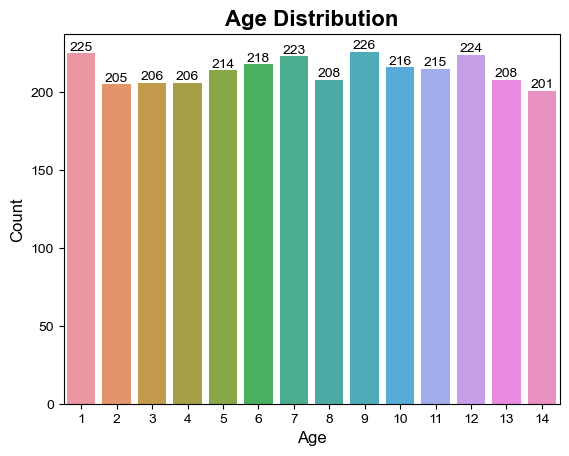

In [12]:
Count_Age=sns.countplot(x='Age',data=dog)
plt.title('Age Distribution',fontsize=16,fontweight='bold')
plt.ylabel('Count',fontsize=12)
plt.xlabel('Age',fontsize=12)
for bar in Count_Age.containers:
    Count_Age.bar_label(bar)
sns.set({'figure.figsize':(20,4)})
plt.show()

Maximum Dogs are of age 9,1 and 12 years.

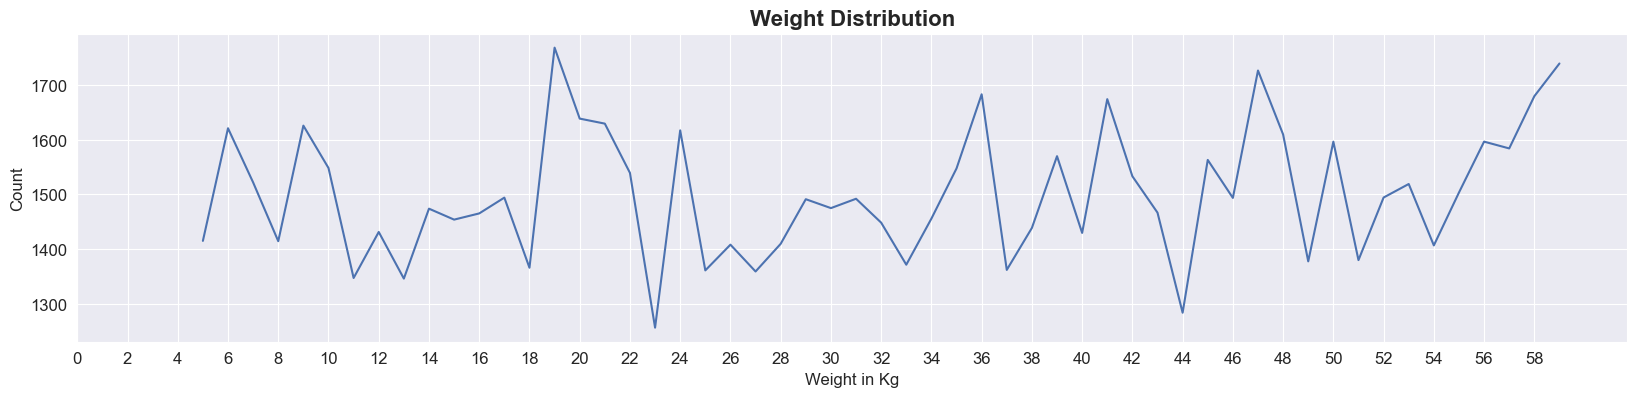

In [13]:
Count_Wgt=sns.lineplot(x='Weight',y='number',data=dog,errorbar=None)
plt.title('Weight Distribution',fontsize=16,fontweight='bold')
plt.ylabel('Count',fontsize=12)
plt.xlabel('Weight in Kg',fontsize=12)
sns.set({'figure.figsize':(15,4)})
plt.xticks((range(0,dog['Weight'].max()+1,2)),fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

Most of the Dogs have weight between 18-20,58-60 and 46-48 kg and mode of the weight is 22 kg.

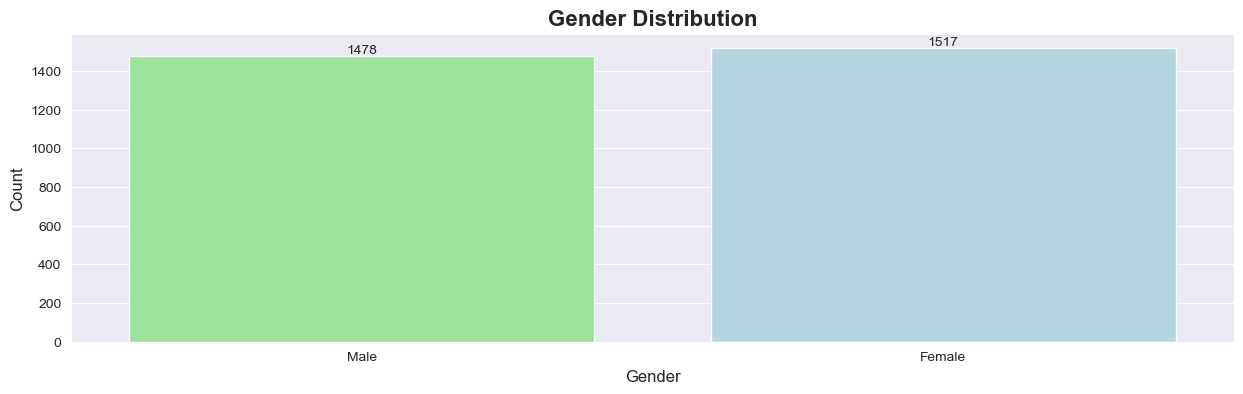

In [14]:
Count_Gender=sns.countplot(x='Gender',data=dog,palette={'Male':'lightgreen','Female':'lightblue'})
plt.title('Gender Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Gender',fontsize=12)
plt.ylabel('Count',fontsize=12)
sns.set({'figure.figsize':(9,4)})
for bar in Count_Gender.containers:
    Count_Gender.bar_label(bar)

The number of Female Dogs (1517) is greater than Male dogs (1478)

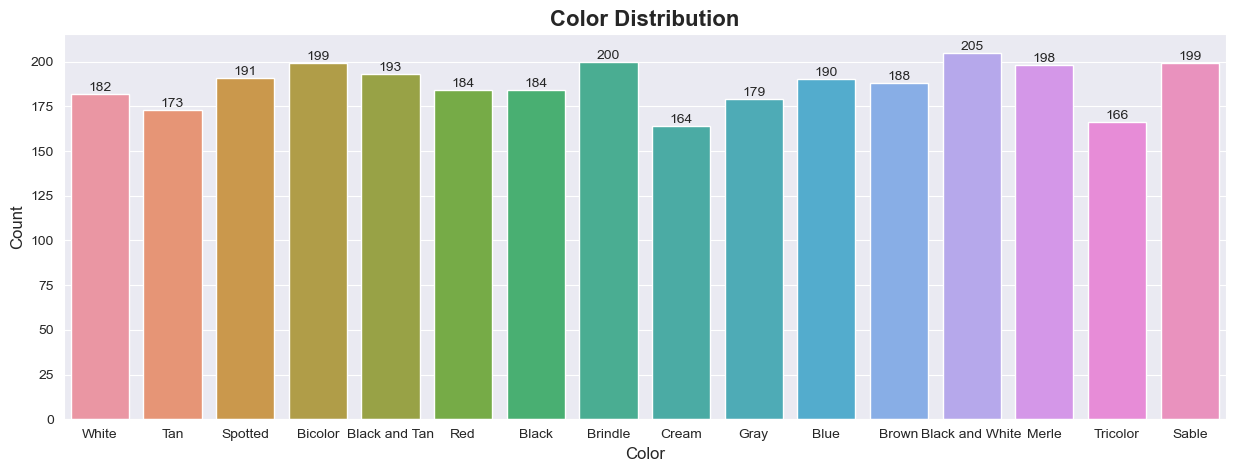

In [16]:
Color_Count=sns.countplot(x='Color',data=dog)
plt.title('Color Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Color',fontsize=12)
plt.ylabel('Count',fontsize=12)
sns.set({'figure.figsize':(15,5)})
for bar in Color_Count.containers:
    Color_Count.bar_label(bar)
plt.show()

Mostly, Dogs have Black and White , Brindle , Sable and Bicolor colors.

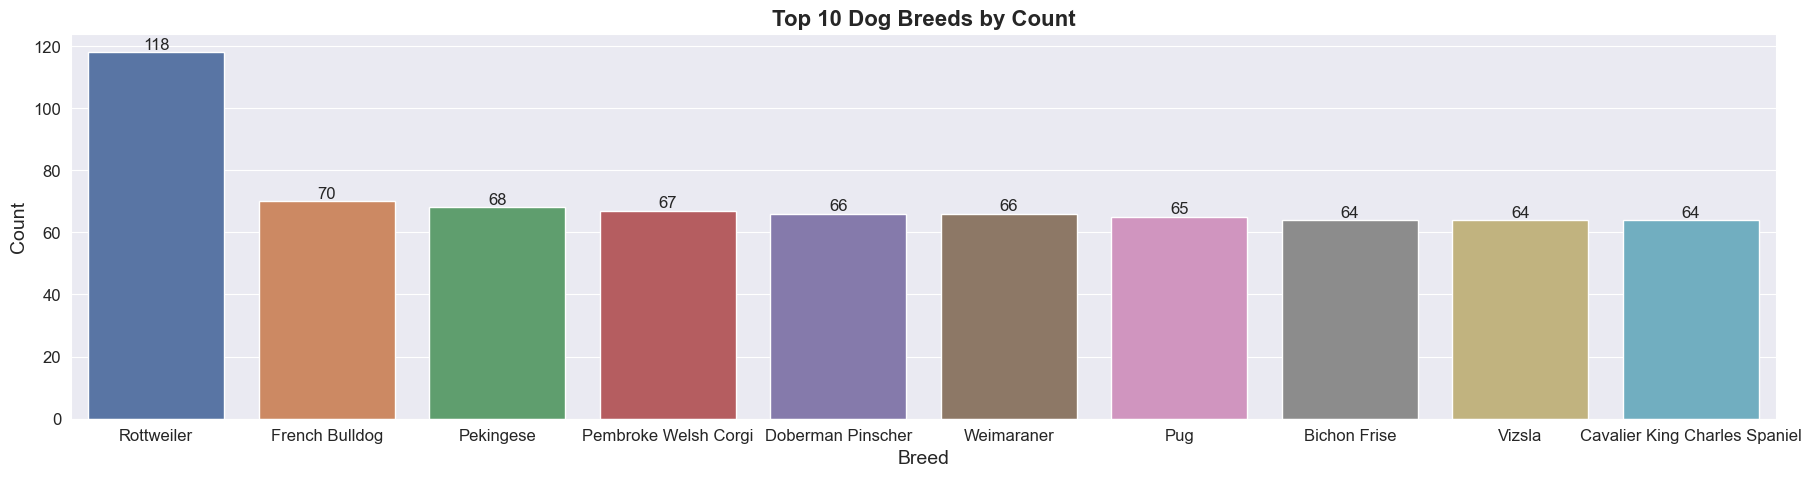

In [17]:
Dog_Breed = dog['Breed'].value_counts().head(10)
Top_Dog_Breeds = dog[dog['Breed'].isin(Dog_Breed.index)]
sns.set({'figure.figsize': (22, 5)})
Breed_Count = sns.countplot(x='Breed', data=Top_Dog_Breeds, order=Dog_Breed.index)
plt.title('Top 10 Dog Breeds by Count',fontsize=16,fontweight='bold')
plt.xlabel('Breed',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(rotation=0,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
for bar in Breed_Count.containers:
    Breed_Count.bar_label(bar,fontsize=12)
plt.show()

Most Popular Breeds are Rottweiler, French Bulldog and Pekingese.

# Correlation Analysis

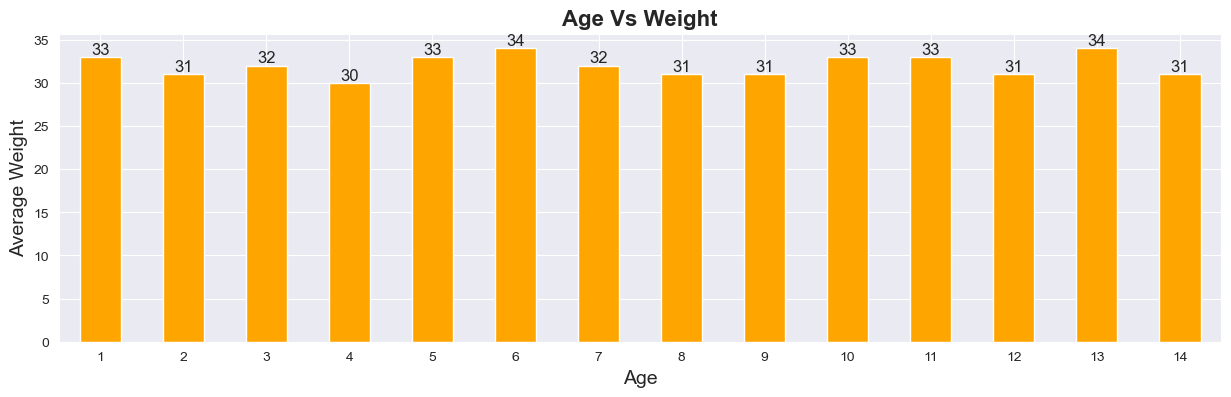

In [18]:
AgevWgt=round(dog.groupby(['Age'])['Weight'].mean())
AgevWgt_plot=AgevWgt.plot(kind='bar',figsize=(15,4),color='orange')
plt.title('Age Vs Weight',fontsize=16,fontweight='bold')
plt.xlabel('Age',fontsize=14)
plt.ylabel('Average Weight',fontsize=14)
plt.xticks(rotation=0)
for bar in AgevWgt_plot.containers:
    AgevWgt_plot.bar_label(bar,fontsize=12)
plt.show()

Dogs of age 6 and 13 years have an average weight of 34 (max) , and dogs of age 4 years have an average weight of 30 (min). Young dogs have an average weight of 32 and older dogs have an average weight of 33.

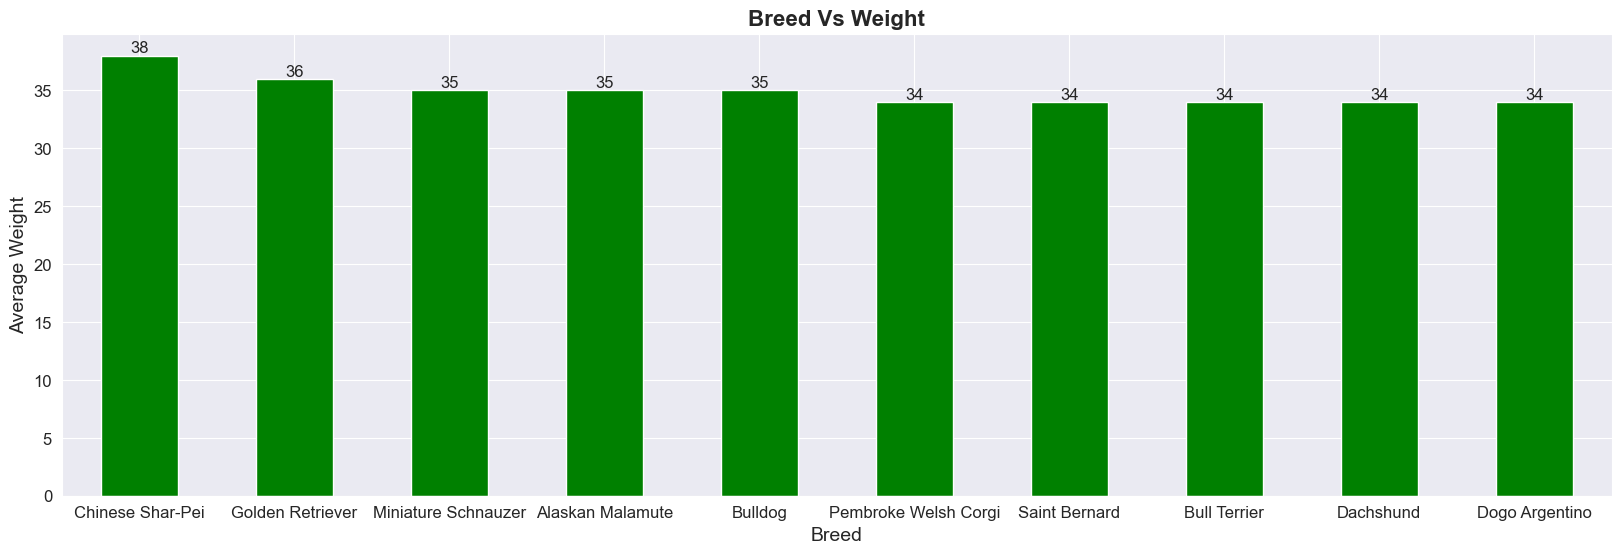

In [19]:
BreedvWgt=round(dog.groupby(['Breed'])['Weight'].mean().sort_values(ascending=False).head(10))
BreedvWgt_plot=BreedvWgt.plot(kind='bar',figsize=(20,6),color='green')
plt.title('Breed Vs Weight',fontsize=16,fontweight='bold')
plt.xlabel('Breed',fontsize=14)
plt.ylabel('Average Weight',fontsize=14)
plt.xticks(rotation=0,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
for bar in BreedvWgt_plot.containers:
    BreedvWgt_plot.bar_label(bar,fontsize=12)
plt.show()

Dogs of Breeds Chinese Shar-Pei, Golden Retriver and Miniature Schnauzer have maximum average weight of 38, 36 and 35 kg , respectively.

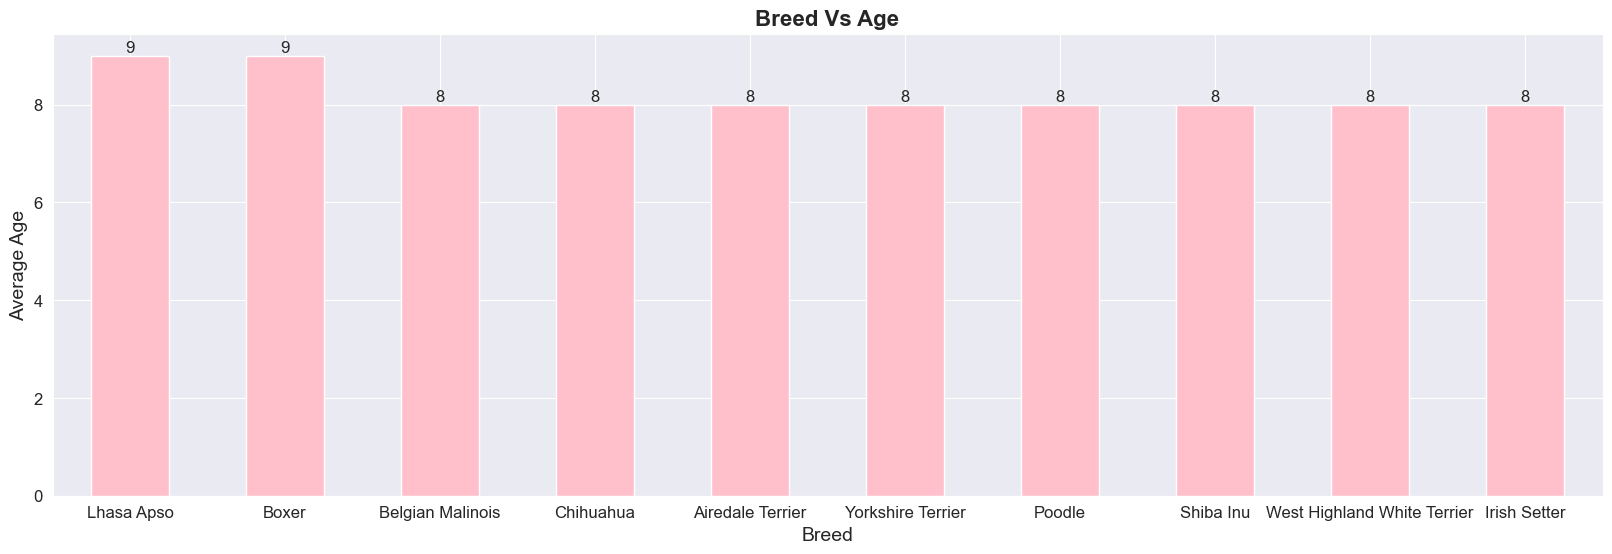

In [20]:
BreedvAge=round(dog.groupby(['Breed'])['Age'].mean().sort_values(ascending=False).head(10))
BreedvAge_plot=BreedvAge.plot(kind='bar',figsize=(20,6),color='pink')
plt.title('Breed Vs Age',fontsize=16,fontweight='bold')
plt.xlabel('Breed',fontsize=14)
plt.ylabel('Average Age',fontsize=14)
plt.xticks(rotation=0,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
for bar in BreedvAge_plot.containers:
    BreedvAge_plot.bar_label(bar,fontsize=12)
plt.show()

Dogs of Breeds Lhasa Apso , Boxer and Beligan Malinois have a maximum of average age 9, 9 and 8 years, repectively.

# Conclusion 

Most common dog ages are 9, 1, and 12 years, with weights frequently between 18-20 kg, 60-68 kg, and 46-48 kg. Black and white, brindle, sable, and bicolor are the most prevalent colors, while Rottweilers, French Bulldogs, and Pekingese are the most popular breeds. Additionally, dogs aged 6 and 13 have the highest average weight, while Chinese Shar-Peis and Golden Retrievers are the heaviest breeds on average and Lhasa Apsos, Boxers, and Belgian Malinois have the highest average ages.